<a href="https://colab.research.google.com/github/kittikhun62/efficientnet_keras_transfer_learning/blob/master/regression_2Class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import from drive

In [2]:
import pandas as pd
import shutil
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv (r'/content/drive/My Drive/data - 2 class Regress.csv')
df

,No,Name_file,Name_Paper,journal,path_Picture,detail,Class,BET,Size(mico),Class_01
0,1,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom1,0-800,135.06,10,0
1,2,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom2,0-800,135.06,10,0
2,3,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom3,0-800,135.06,10,0
3,4,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom4,0-800,135.06,10,0
4,5,pore-sb,Preparation and electrochemical behaviour of b...,Korean J. Chem. Eng,/content/drive/My Drive/new train/pore-sb/PCC(...,zoom5,0-800,135.06,10,0
...,...,...,...,...,...,...,...,...,...,...
795,796,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom21,0-800,301.70,10,0
796,797,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom22,0-800,301.70,10,0
797,798,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom23,0-800,301.70,10,0
798,799,1-s2.0-S2095268622000210-main,"Integration of preparation of K, Na-embedded a...","Dingzheng Wang,Deqing Zhu,Jian Pan, Zhengqi Gu...",/content/drive/My Drive/new train/1-s2.0-S2095...,zoom24,0-800,301.70,10,0


In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [12]:

batch_size = 16

width = 150
height = 150

epochs = 200 #จำนวนรอบในการ Train

NUM_TRAIN = 598  # จำนวนภาพ Train
NUM_TEST = 101 #จำนวนภาพ Test

dropout_rate = 0.3
input_shape = (height, width, 3) #ขนาด image enter

In [13]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning

/content
/content/efficientnet_keras_transfer_learning


In [14]:

# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
# Higher the number, the more complex the model is.
from efficientnet import EfficientNetB0 as Net
from efficientnet import center_crop_and_resize, preprocess_input

In [15]:

# loading pretrained conv base model
# โหลดโมเดล มาโดยตัด output ของโมเดลออก เเต่ยังใช้ input อันเดิม
# เเละโหลด weight ของโมเดล มาด้วยที่ชื่อว่า imagenet
#EfficientNet สร้างขึ้นสำหรับการจำแนกประเภท ImageNet ประกอบด้วยป้ายกำกับคลาส 1,000 รายการ เรามีเพียง 2 เลเยอร์เท่านั้น ซึ่งหมายความว่าเลเยอร์สองสามเลเยอร์สุดท้ายสำหรับการจำแนกไม่มีประโยชน์สำหรับเรา สามารถยกเว้นได้ขณะโหลดโมเดลโดยระบุอาร์กิวเมนต์ include_top เป็น False และนำไปใช้กับโมเดล ImageNet อื่นๆ ที่มีอยู่ในแอปพลิเคชัน Keras เช่นกัน

conv_base = Net(weights='imagenet', include_top=False, input_shape=input_shape)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


16717576/16717576 [==============================] - 1s 0us/step


In [16]:
import os

In [26]:
DATA_PATH = '/content/drive/My Drive/new Regress'
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
validation_dir = os.path.join(DATA_PATH, 'validation')
print(validation_dir)

/content/drive/My Drive/new Regress/train
/content/drive/My Drive/new Regress/validation


In [27]:

val = df[df['No'].between(599,699)]
train = df[df['No'].between(1,598)]
test = df[df['No'].between(700,800)] 

In [18]:
import sys
sys.path.append('/content/drive/My Drive/new/2Class_regression_freeze_1000.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [19]:
#load model 
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/new/2Class_regression_freeze_1000.h5')
height = width = model.input_shape[1]
     

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 5, 5, 1280)       4049564   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 2)                 2562      
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 4,052,129
Trainable params: 2,565
Non-trainable params: 4,049,564
__________________________________________

# unfreeze

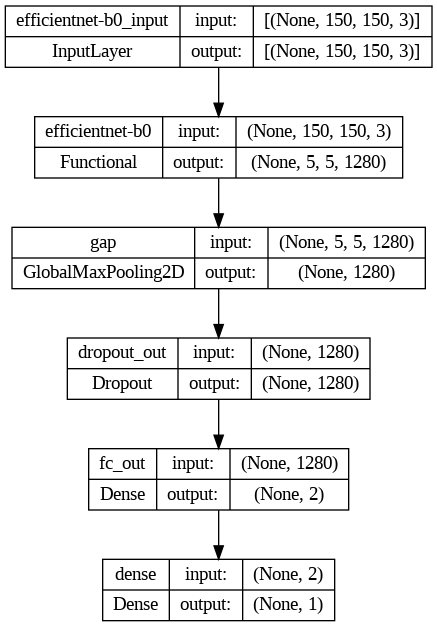

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='conv_base.png', show_shapes=True)

In [22]:
# set 'multiply_16' and following layers trainable (Unfreeze --> multiply_16 ) ให้เป็น layers ที่ train ชุดข้อมูลใหม่
model.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'multiply_15':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
print('This is the number of trainable layers '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable layers after freezing the conv base: 215


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 5, 5, 1280)       4049564   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 2)                 2562      
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 4,052,129
Trainable params: 4,010,113
Non-trainable params: 42,016
_________________________________________

In [28]:
# Train ด้วย ImageDataGenerator ของ Keras ซึ่งจะเพิ่มข้อมูลเสริมระหว่างการฝึกเพื่อลดโอกาสเกิด overfitting
#overfitting เกิดจากข้อมูลที่ซับซ้อนกันเกินไป
#Image Augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, # image input 0-255 --> 0-1 เปลี่ยนค่าสี
      rotation_range=40,# หมุนภาพในองศา
      width_shift_range=0.2, #เปลี่ยนความกว้าง
      height_shift_range=0.2, #ปลี่ยนความสูง
      shear_range=0.2, #ทำให้ภาพเบี้ยว
      zoom_range=0.2, # Randomly zoom image
      horizontal_flip=True, 
      #โดย Default เมื่อมีการเลื่อนภาพ บิดภาพ หมุนภาพ จะเกิดพื้นที่ว่างที่มุม 
      #ซึ่งจะมีการเติมภาพให้เต็มโดยใช้เทคนิคแบบ Nearest neighbor ซึ่งเป็นการดึงสีบริเวณใหล้าเคียงมาระบายให้เต็ม แต่เราก็ยังสามารถกำหนดวิธีการ Fill ภาพด้วยเทคนิคอื่นได้จาก Parameter fill_mode
      fill_mode='nearest')
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'path_Picture',
        y_col = 'BET',
        class_mode = 'other',
        target_size=(height, width),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_dataframe(
        dataframe = val,
        directory = validation_dir,
        x_col = 'path_Picture',
        y_col = 'BET',
        class_mode = 'other',
        target_size=(height, width),
        batch_size=batch_size)
     

Found 598 validated image filenames.
Found 101 validated image filenames.


# Training

In [29]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps= NUM_TEST //batch_size,
      verbose=1,
      use_multiprocessing=True,
      workers=4)

<ipython-input-29-caa7b37242a8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/200
37/37 [==============================] - 61s 1s/step - loss: 500896.4375 - mae: 639.9666 - val_loss: 406727.6562 - val_mae: 496.4871
Epoch 2/200
37/37 [==============================] - 3s 89ms/step - loss: 503059.0312 - mae: 642.1101 - val_loss: 398915.2500 - val_mae: 488.6587
Epoch 3/200
37/37 [==============================] - 3s 75ms/step - loss: 505105.9375 - mae: 643.0819 - val_loss: 406830.1250 - val_mae: 496.0732
Epoch 4/200
37/37 [==============================] - 4s 93ms/step - loss: 504161.0000 - mae: 642.3970 - val_loss: 407671.0938 - val_mae: 497.8333
Epoch 5/200
37/37 [==============================] - 8s 207ms/step - loss: 499012.6250 - mae: 638.9106 - val_loss: 398557.3438 - val_mae: 487.9905
Epoch 6/200
37/37 [==============================] - 8s 221ms/step - loss: 498706.5312 - mae: 638.8349 - val_loss: 406625.8438 - val_mae: 496.4372
Epoch 7/200
37/37 [==============================] - 3s 78ms/step - loss: 502833.0312 - mae: 641.0758 - val_loss: 415764.75

In [30]:
history.history 

{'loss': [500896.4375,
  503059.03125,
  505105.9375,
  504161.0,
  499012.625,
  498706.53125,
  502833.03125,
  501984.21875,
  494511.1875,
  499476.1875,
  501413.0625,
  497952.71875,
  496502.71875,
  504481.96875,
  501805.09375,
  498162.3125,
  498531.6875,
  502187.375,
  501023.9375,
  500081.53125,
  493494.15625,
  503457.375,
  502607.0,
  498345.28125,
  502905.84375,
  492932.28125,
  501206.4375,
  499638.71875,
  502303.28125,
  502720.0625,
  497311.9375,
  502432.21875,
  501878.15625,
  500086.96875,
  498242.8125,
  497375.78125,
  494525.75,
  504685.96875,
  505010.59375,
  501785.5,
  496663.1875,
  494434.375,
  500888.09375,
  495675.375,
  505324.4375,
  493487.5,
  502039.8125,
  493145.40625,
  500732.65625,
  500680.6875,
  502508.03125,
  495876.625,
  496640.125,
  502125.59375,
  502914.3125,
  501446.5,
  499898.28125,
  495646.5625,
  492437.59375,
  501865.78125,
  498126.78125,
  505215.1875,
  504396.21875,
  504307.78125,
  494812.03125,
  502577

### Plot training performance

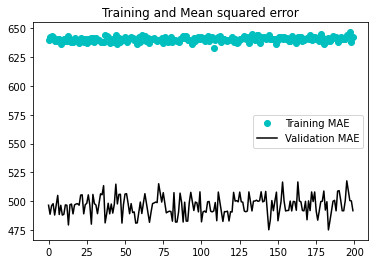

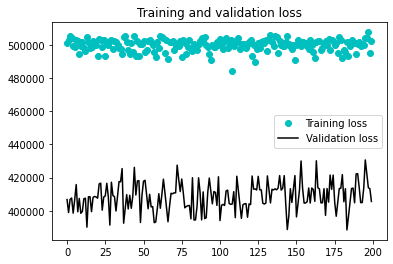

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs_x = range(len(loss))

plt.plot(epochs_x, mae, 'co', label='Training MAE')
plt.plot(epochs_x, val_mae, 'k', label='Validation MAE')
plt.title('Training and Mean squared error')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'co', label='Training loss')
plt.plot(epochs_x, val_loss, 'k', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**SAVE model** 

In [33]:
os.makedirs('./content/drive/My Drive/new', exist_ok=True)
model.save('./content/drive/My Drive/new/2Class_regression_unfreeze_new.h5')

In [34]:
from google.colab import files

In [35]:
files.download("./content/drive/My Drive/new/2Class_regression_unfreeze_new.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>